# Exercicio - Lorenz Attractor
> Gil Miranda<br>
> Repo: https://github.com/mirandagil/university-courses/tree/master/comp-cientifica-II-2019-2<br>
> GitHub: @mirandagil
   
`last update: 26/08/2019`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [2]:
def f_euler(F, y0, ts, p = 0):
    ys = np.array([y0])  
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(ys[-1], p[0], p[1], p[2])*h
        ys = np.vstack((ys, ynext))
        t = tnext
    return np.array(ys)

In [3]:
def lorenz(u, s, p, b):
    x = u[0]
    y = u[1]
    z = u[2]
    return np.array([s*(y-x),x*(p-z)-y,x*y-b*z])

In [4]:
ts = np.arange(0,30,0.005)
u0 = [1,0,0]
s = 10
p = 27
b = 8/3

In [5]:
len(ts)

6000

In [6]:
sol = f_euler(lorenz, u0, ts, [s, p, b])

In [7]:
xs = sol.T[0]
ys = sol.T[1]
zs = sol.T[2]

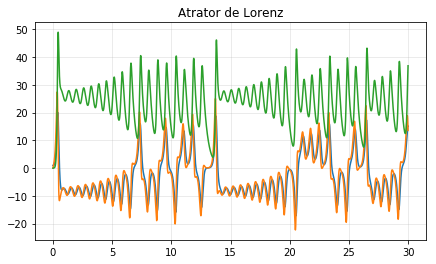

In [8]:
plt.figure(figsize=(7,4))
plt.plot(ts, xs)
plt.plot(ts, ys)
plt.plot(ts, zs)
plt.grid(alpha=0.3)
plt.title('Atrator de Lorenz')
plt.show()

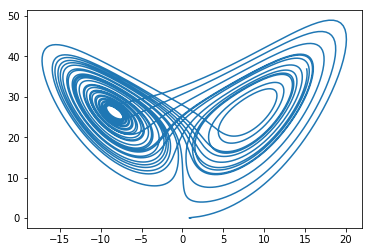

In [9]:
plt.plot(xs,zs)

<IPython.core.display.Javascript object>


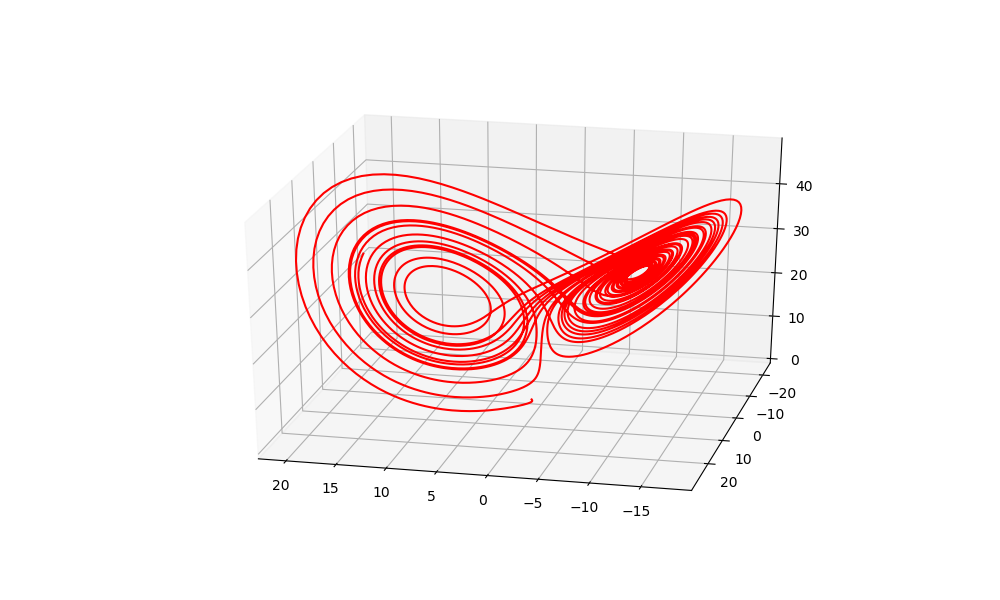

In [17]:
fig = plt.figure(figsize=(10,6))
plt.title('Atrator de Lorenz')
ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, color='red')
plt.show()

<IPython.core.display.Javascript object>


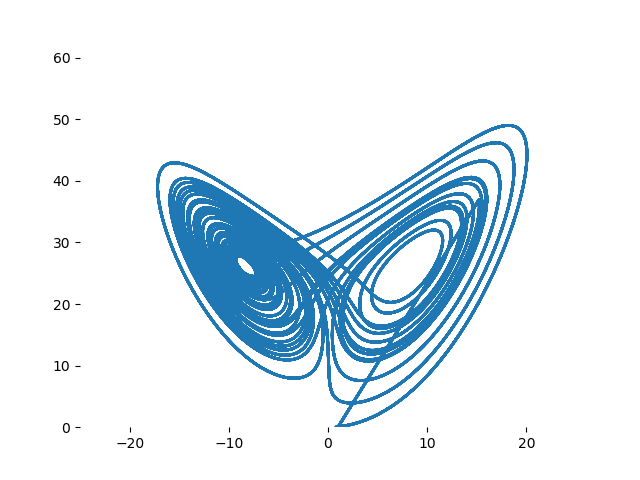

In [18]:
%matplotlib notebook
fig = plt.figure() 
ax = plt.axes(xlim=(-25, 25), ylim=(0, 60)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
	# x, y values to be plotted 
	x = xs[i] 
	y = zs[i] 
	
	# appending new points to x, y axes points list 
	xdata.append(x) 
	ydata.append(y) 
	line.set_data(xdata, ydata) 
	return line, 
	
# setting a title for the plot 
plt.title('Lorenz Attractor') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=6000, interval=5, blit=True) 